In [ ]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev -DCMAKE_BUILD_TYPE=Release ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()

In [3]:
import numpy as np

In [4]:
from tqdm.notebook import tqdm

In [5]:
import random

In [28]:
# for i, hidden in enumerate(range(200, 1200, 200)):
def learn(hidden, it = 100000):
    print(f"hidden = {int(hidden)}")
    model = pypumila.Pumila6r.make_shared(int(hidden))
    reward = []
    score = []
    # ih = []
    with tqdm(total=it) as pbar:
        while pbar.n < it:
            sim = pypumila.GameSim()
            rnd_p = random.random()
            # print(rnd_p)
            for e in range(50):
                sim.step()
                pbar.update()
                field = sim.field_copy()
                reward.append(model.calc_reward(field))
                a = model.get_action_rnd(field, rnd_p)
                model.learn_step(field)
                # diff = model.mean_diff
                sim.put(pypumila.actions[a])
                while not sim.is_free_phase():
                    sim.step()
            score.append(sim.field_copy().total_score)
            # ih.append(model.main.get_matrix_ih())
    model.save_file(f"pumila6r_{hidden}")
    return [model, reward, score]

In [29]:
import matplotlib.pyplot as plt

In [30]:
hidden = [int(h) for h in np.geomspace(100, 10000, 5)]
models = []
rewards = []
scores = []
for i in range(len(hidden)):
    model, reward, score = learn(hidden[i])
    models.append(model)
    rewards.append(reward)
    scores.append(score)

hidden = 100


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 316


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 1000


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 3162


  0%|          | 0/100000 [00:00<?, ?it/s]

hidden = 10000


  0%|          | 0/100000 [00:00<?, ?it/s]

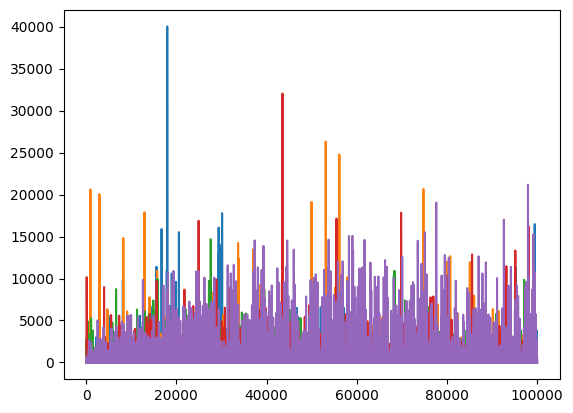

In [31]:
plt.plot(np.array(rewards).T, label=hidden)

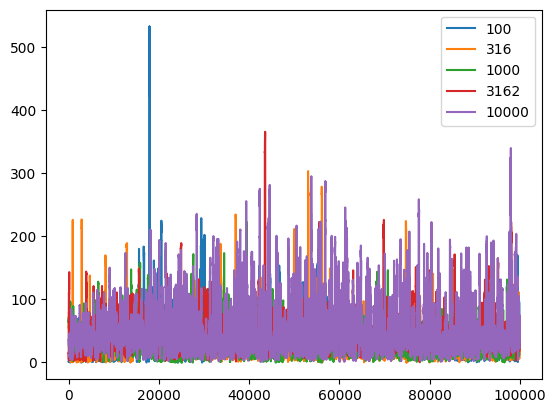

In [32]:
ar = np.array(rewards)
plt.plot(
    np.array([[np.average(ar[j, i:i+100]) for i in range(len(rewards[j])-100)] for j in range(len(rewards))]).T,
    label=hidden
)
plt.legend()

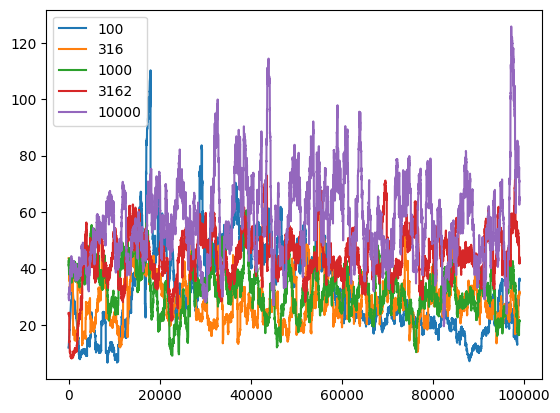

In [34]:
ar = np.array(rewards)
plt.plot(
    np.array([[np.average(ar[j, i:i+1000]) for i in range(len(rewards[j])-1000)] for j in range(len(rewards))]).T,
    label=hidden
)
plt.legend()

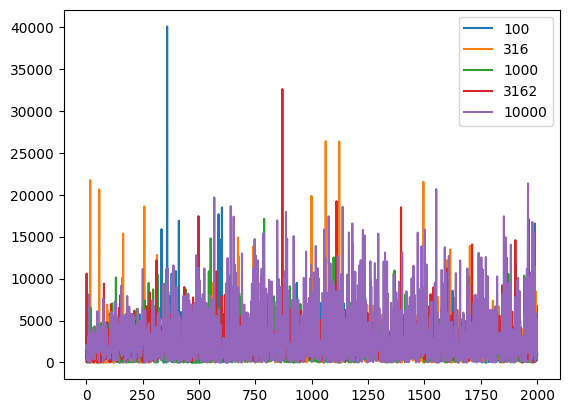

In [33]:
plt.plot(np.array(scores).T, label=hidden)
plt.legend()

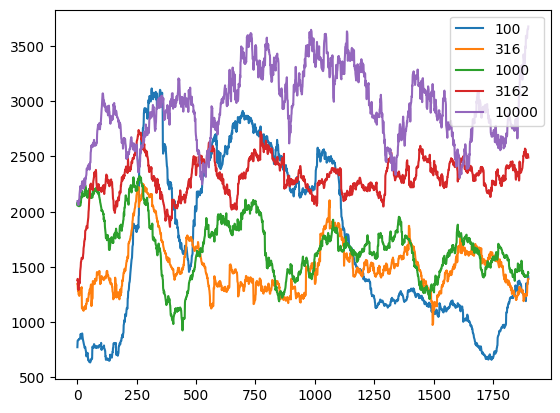

In [35]:
ar = np.array(scores)
plt.plot(
    np.array([[np.average(ar[j, i:i+100]) for i in range(len(scores[j])-100)] for j in range(len(scores))]).T,
    label=hidden
)
plt.legend()

In [45]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
win.step(False)

In [46]:
while True:
    a = models[3].get_action(sim)
    sim.put(pypumila.actions[a])
    # sim.soft_put(pypumila.actions[a])
    while sim.is_free_phase():
        win.step(True)
    while not sim.is_free_phase():
        win.step(True)
    for i in range(15):
        win.step(True)

KeyboardInterrupt: 

In [47]:
win.quit()